In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(r'..\movingrange'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import movingrange
import numpy as np
import pandas as pd

In [3]:
import importlib

In [4]:
importlib.reload(movingrange)

number_of_records = 50
values = np.random.randint(1,51,number_of_records)
periods = range(number_of_records)

x = movingrange.movingrange(12)
x.load_from_arrays(periods, values)

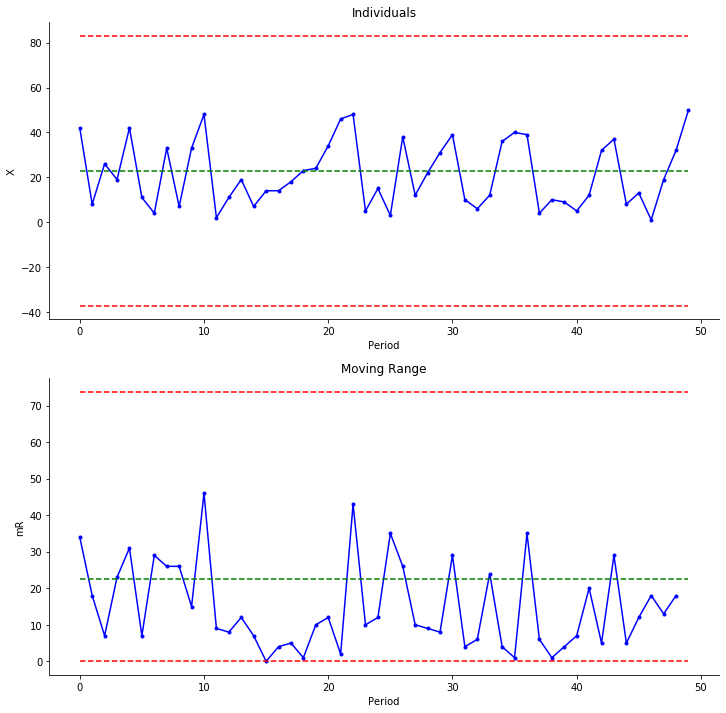

In [5]:
x.plot()

In [6]:
x.rules.basic_rules()

{'Rule 1': [], 'Rule 2': [12, 13, 14, 15, 16, 17, 18]}

In [7]:
x.rules.western_electic_rules()

{'Rule 1': [], 'Rule 2': [], 'Rule 3': [], 'Rule 4': []}

In [8]:
x.rules.nelson_rules()

{'Rule 1': [],
 'Rule 2': [],
 'Rule 3': [17, 18, 19, 20, 21, 22],
 'Rule 4': [],
 'Rule 5': [],
 'Rule 6': [],
 'Rule 7': [24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 'Rule 8': []}

In [9]:
x.describe()

Population
Number of Samples = 50
Population Mean = 21.460
Population Maximum = 50
Population Minimum = 1
Number of Segments = 1



In [10]:
x.segments[len(x.segments) - 1].describe()

Segment
Number of Samples = 50
Start Position = 0
End Position = 50
Segment Minimum = 1
Segment Maximum = 50
----------------------
Segment Mean = 22.917
Items Above Mean = 21
Items Below Mean = 29
Average Change = 14.816
----------------------
Sigma(X) = 20.024
 3+ Sigma = (0 items)
 3  Sigma = 82.988 (0 items)
 2  Sigma = 62.964 (4 items)
 1  Sigma = 42.941 (17 items)
 0  Sigma = 22.917
-1  Sigma = 2.893 (27 items)
-2  Sigma = -17.131 (2 items)
-3  Sigma = -37.155 (0 items)
-3+ Sigma = (0 items)

